In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [3]:
import tensorflow as tf
tdata = pd.read_csv("train.csv") # read train data
ttdata = pd.read_csv("test.csv") # read test data

In [4]:
print(tdata.max().max())
print(ttdata.max().max())

# check the maximum value and normalize
tdata_x = tdata.iloc[:,1:]/tdata.max().max()
tdata_y = tdata.iloc[:,0]
ttdata_x = ttdata/ttdata.max().max()

255
255


In [6]:
# make model with Convolution layer sequential
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3),activation = 'relu', input_shape = (28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [8]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = ['accuracy'],
             )

In [9]:
model.fit(np.array(tdata_x).reshape(-1,28,28,1), np.array(tdata_y), epochs = 5, validation_split = 0.2)

Epoch 1/5
1050/1050 [==============================] - 9s 9ms/step - loss: 0.4628 - accuracy: 0.8540 - val_loss: 0.0663 - val_accuracy: 0.9804
Epoch 2/5
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0659 - accuracy: 0.9804 - val_loss: 0.0620 - val_accuracy: 0.9807
Epoch 3/5
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0432 - accuracy: 0.9859 - val_loss: 0.0444 - val_accuracy: 0.9858
Epoch 4/5
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.0533 - val_accuracy: 0.9848
Epoch 5/5
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0260 - accuracy: 0.9910 - val_loss: 0.0537 - val_accuracy: 0.9833


[2 0 9 0 3]


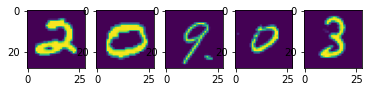

In [18]:
# Checking model be trained well
import matplotlib.pyplot as plt

plt.subplots(1,5)
result = model.predict(np.array(ttdata_x).reshape(-1,28,28,1))
for i in range(0,5):
    plt.subplot(1,5,i+1)
    plt.imshow(ttdata_x.iloc[i,:].to_numpy().reshape(28,28,1))
    
print(np.argmax(result,axis = 1)[0:5])

In [19]:
# make submission file for kaggle

submit = {"ImageId":[i+1 for i in ttdata.index ],"Label": np.argmax(result, axis = 1)}
pd.DataFrame(submit).to_csv("submission.csv",mode = "w",index = False)